How Banks use Data Analytics to assess Risks & Opportunities

You are a Data Analyst at a bank. Your objective is to discover new avenues for Growth & Enhance Customer Experiences.
Your task involves using data analytics to assess risks and opportunities at HDFC Bank, focusing on growth avenues and enhancing customer experiences.

1. **Data Loading and exploration**: Gathering a diverse range of data. This includes: Transaction records, Customer Profiles, Economic Indicators, Market Trends, and Digital Banking Usage Patterns

2. **Data Preprocessing**: Merging Datasets, create New Calculated Metrics & Standardizing Variables that provide deeper insights into customer behaviors & market dynamics.

3. **Exploratory Data Analysis**: To **identify your customers** that require **loan, risks and opportunities** with them?While  conducting EDA, we will find the following: 
    
        Q1: What is the distribution of customers' age, income, education level, and marital status in dataset?   
        Q2: How does credit card usage vary across different age groups? Are there any trends in spending behavior?        
        Q3: Are there any noticeable seasonal patterns in mortgage application submissions throughout the year?           
        Q4: Are there correlations between economic indicators and trends in investment activity among customers?
            

4. **Construct Predictive models** based on findings:
        1. To identify high risk segments,
        2. forecast credit demand
        enabling the bank to allocate resources efficiently


### Data Gathering
- **Transaction Records**: Collect data on customer transactions, including amounts, dates, and types of transactions.
- **Customer Profiles**: Gather information on customer demographics, such as age, income, education level, and marital status.
- **Economic Indicators**: Include data on inflation rates, interest rates, GDP growth, and other relevant economic factors.
- **Market Trends**: Research current trends in the banking industry, customer preferences, and competitive landscape.
- **Digital Banking Usage Patterns**: Analyze data on how customers interact with digital banking platforms, including frequency and types of transactions.

Generated some synthetic data that resembles the datasets : customer profiles, transaction records, and digital banking usage patterns. This data will be simplistic and for illustrative purposes only.

- **Customer Profiles**: This dataset will include customer_id, age, gender, marital_status, and credit_card_approved.
- **Transaction Records**: This dataset will contain customer_id, transaction_amount, and transaction_date.
- **Digital Banking Usage Patterns**: This includes customer_id, login_count_last_30_days, and mobile_app_usage_score.


In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate Customer Profiles
customer_ids = range(1, 101)  # 100 customers
ages = np.random.randint(18, 70, size=100)
genders = np.random.choice(['Male', 'Female'], size=100)
marital_status = np.random.choice(['Married', 'Unmarried'], size=100)
credit_card_approved = np.random.choice([True, False], size=100, p=[0.7, 0.3])

customer_profiles = pd.DataFrame({
    'customer_id': customer_ids,
    'age': ages,
    'gender': genders,
    'marital_status': marital_status,
    'credit_card_approved': credit_card_approved
})

# Generate Transaction Records
transaction_amounts = np.random.randint(100, 10000, size=300)  # 300 transactions
transaction_dates = pd.date_range(start='2023-01-01', end='2023-12-31', periods=300)
customer_ids_transactions = np.random.choice(customer_ids, size=300)

transactions = pd.DataFrame({
    'customer_id': customer_ids_transactions,
    'transaction_amount': transaction_amounts,
    'transaction_date': transaction_dates
})

# Generate Digital Banking Usage Patterns
login_counts = np.random.randint(0, 100, size=100)
app_usage_scores = np.random.uniform(0, 10, size=100)

digital_usage = pd.DataFrame({
    'customer_id': customer_ids,
    'login_count_last_30_days': login_counts,
    'mobile_app_usage_score': app_usage_scores
})

# Display the first few rows of the customer profiles to confirm
print(customer_profiles.head())


   customer_id  age gender marital_status  credit_card_approved
0            1   56   Male      Unmarried                  True
1            2   69   Male      Unmarried                 False
2            3   46   Male      Unmarried                  True
3            4   32   Male        Married                  True
4            5   60   Male      Unmarried                 False


Three separate dataframes are created: customer_profiles, transactions, and digital_usage, each containing synthetic data.

### Data Processing
- **Merging Datasets**: Combine all collected data into a unified dataset for analysis.
- **Creating New Metrics**: Calculate new metrics that can provide insights, such as average transaction size, customer lifetime value, and digital engagement scores.
- **Standardizing Variables**: Ensure consistency in the data, such as converting all monetary values to a single currency and standardizing date formats.

### Exploratory Data Analysis (EDA)
- **Customer Segmentation**: Analyze the distribution of customers' demographics. Use a column chart to segment customers by marital status, age, and gender.
- **Credit Card Usage**: Examine how credit card usage varies across age groups and identify spending behavior trends. Create a bar graph showing approved vs. not approved customers across age groups.
- **Seasonal Patterns in Mortgages**: Identify any seasonal trends in mortgage applications and approvals. Use a line chart to display these patterns across months.
- **Economic Indicators Correlation**: Investigate how economic indicators correlate with investment activity among customers. This may involve statistical analysis to find correlations.

We'll focus on two key explorations:

- Customer Segmentation Analysis: We'll analyze the distribution of customers by marital status and gender.
- Credit Card Usage Across Age Groups: We'll examine how credit card approval rates vary across different age groups.

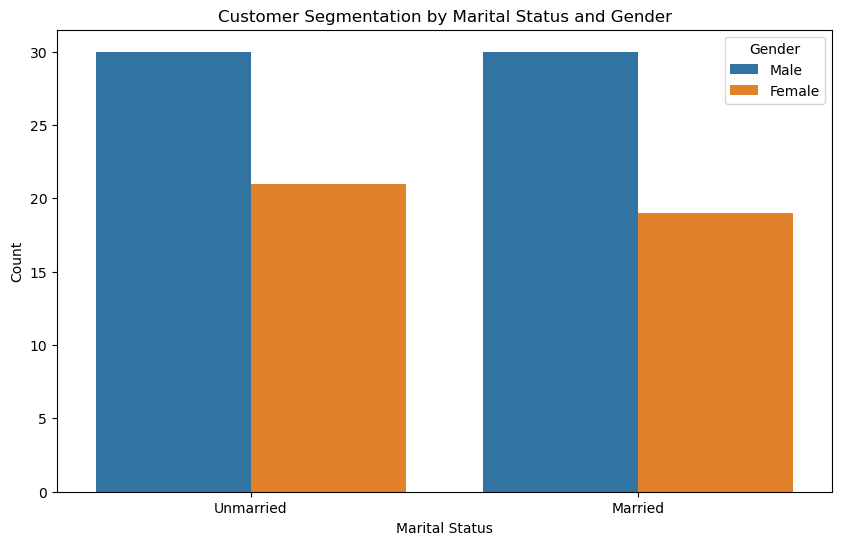

In [2]:
# Customer Segmentation Analysis

#We'll start by creating a column chart to visualize the customer segmentation by marital status and gender.
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Segmentation by Marital Status and Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='gender', data=customer_profiles)
plt.title('Customer Segmentation by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


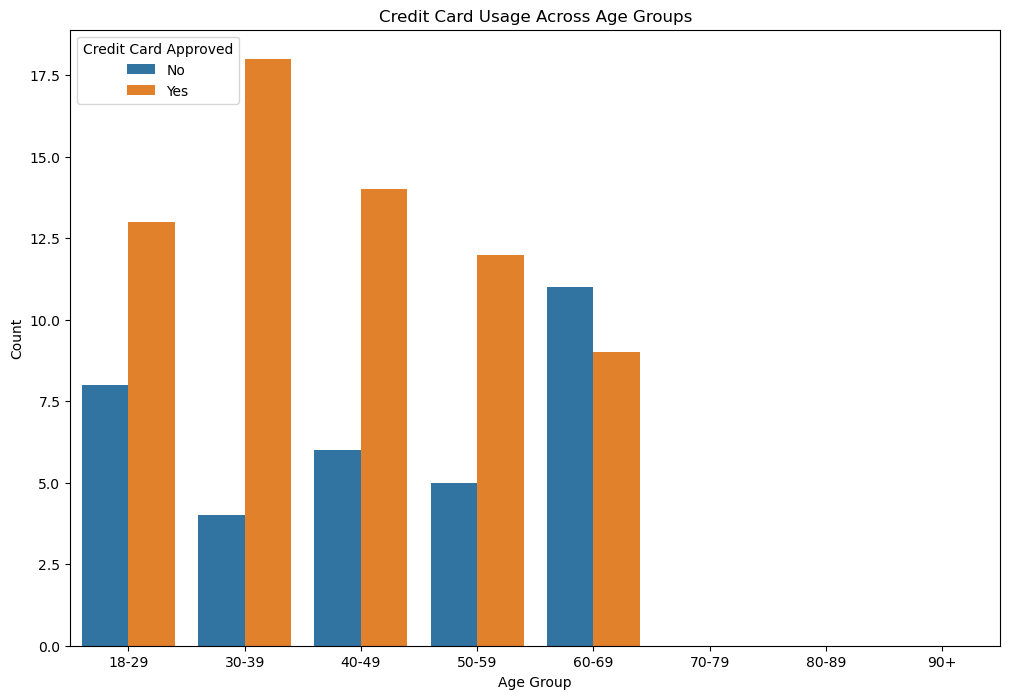

In [3]:
# Credit Card Usage Across Age Groups

# We'll categorize customers into age groups and analyze credit card approval rates within these groups.
# Define age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
customer_profiles['age_group'] = pd.cut(customer_profiles['age'], bins=age_bins, labels=age_labels, right=False)

# Credit Card Usage Across Age Groups
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='credit_card_approved', data=customer_profiles)
plt.title('Credit Card Usage Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Credit Card Approved', labels=['No', 'Yes'])
plt.show()


Based on these initial explorations, we can delve deeper into other analyses such as:
- Investigating the relationship between digital banking usage patterns and customer demographics.
- Analyzing transaction data for trends in spending, high-value transactions, or unusual patterns that could indicate fraud.
- Seasonal analysis of transaction data to identify peak periods for different types of banking activities.

##### Digital Banking Usage Analysis
- **Login Count vs. Age Group**: Understand if there's a correlation between age and digital engagement measured by login counts.
- **Mobile App Usage Score vs. Age Group**: Analyze if the mobile app usage score, an indicator of how actively customers use the bank's mobile app, varies across different age groups.

#### Login Count vs. Age Group

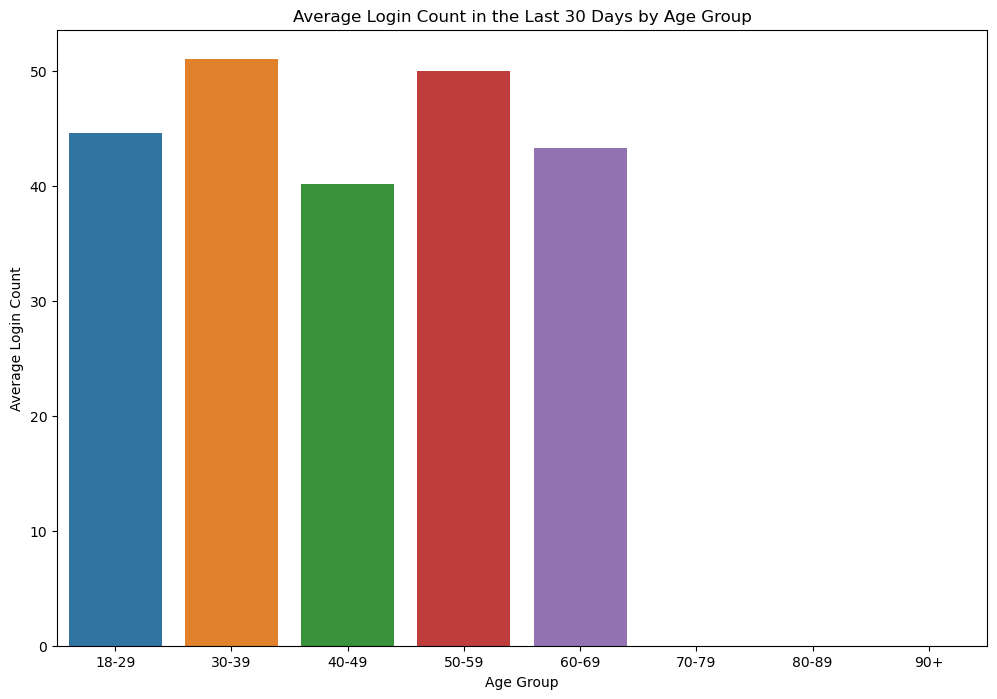

In [4]:
# Merge customer_profiles with digital_usage on customer_id
# visualize the average login count in the last 30 days across different age groups.
merged_data = pd.merge(customer_profiles, digital_usage, on='customer_id')

# Average Login Count by Age Group
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='login_count_last_30_days', data=merged_data, ci=None)
plt.title('Average Login Count in the Last 30 Days by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Login Count')
plt.show()


This bar plot will show the average number of logins in the last 30 days for each age group, helping us understand which age groups are more engaged with digital banking.

#### Mobile App Usage Score vs. Age Group

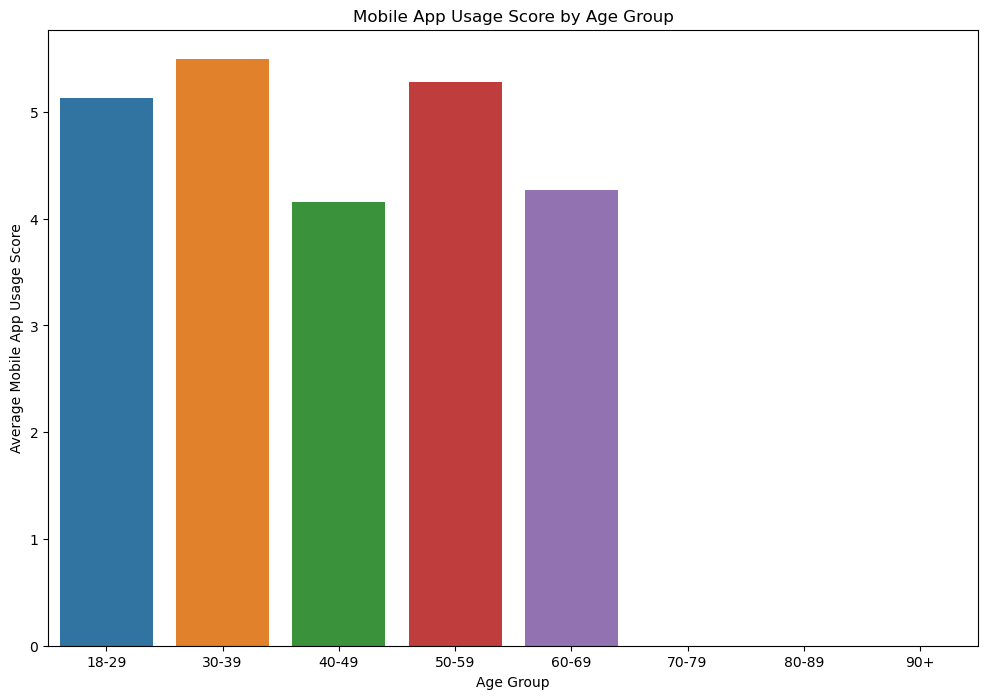

In [5]:
# Mobile App Usage Score by Age Group
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='mobile_app_usage_score', data=merged_data, ci=None)
plt.title('Mobile App Usage Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Mobile App Usage Score')
plt.show()


This visualization will provide insights into the level of engagement customers have with the mobile banking app, broken down by age group

### Predictive Modeling
- **High-Risk Segments Identification**: Develop models to predict which customer segments are at high risk of defaulting on loans or credit payments.

- **Forecasting Credit Demand**: Create models to forecast future credit demand based on historical data and predictive indicators.

Conclusion and Further Steps:

These analyses offer a glimpse into how different customer segments interact with digital banking platforms. Understanding these patterns can help in tailoring digital banking features and marketing strategies to better meet the needs of various customer demographics.

Further analyses could include:

Segmenting customers based on transaction behaviors and identifying high-value customers.
Conducting a cohort analysis to see how digital banking engagement evolves over time for different customer segments.
Investigating the impact of economic indicators on transaction volumes and digital banking usage

### High-Risk Segments Identification

#### Data Preparation
First, we need to prepare our data for modeling. This involves creating a target variable for loan default risk, which we'll simulate since our synthetic data doesn't include it.

In [6]:
# Assuming 'credit_card_approved' column can be a proxy for financial reliability
# Simulate 'loan_default' as a target variable, inversely related to 'credit_card_approved'
merged_data['loan_default'] = np.where(merged_data['credit_card_approved'], 
                                       np.random.choice([0, 1], p=[0.8, 0.2], size=len(merged_data)),
                                       np.random.choice([0, 1], p=[0.4, 0.6], size=len(merged_data)))

# Feature selection
features = merged_data[['age', 'gender', 'marital_status', 'login_count_last_30_days', 'mobile_app_usage_score']]
target = merged_data['loan_default']

# Encoding categorical variables
features = pd.get_dummies(features, drop_first=True)


#### Train-Test Split
Split the data into training and testing sets to evaluate the performance of our model.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


#### Model Selection
We'll use a logistic regression model as a starting point, given its suitability for binary classification tasks.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#### Model Evaluation
Evaluate the model's performance on the test set.

In [9]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17  4]
 [ 6  3]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.43      0.33      0.38         9

    accuracy                           0.67        30
   macro avg       0.58      0.57      0.57        30
weighted avg       0.65      0.67      0.65        30



#### Identifying High-Risk Segments
Analyze the model coefficients to understand which features contribute most to the risk of loan default.

In [10]:
feature_importance = pd.DataFrame(model.coef_[0], index=features.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importance)


                          importance
gender_Male                 0.503147
age                         0.025128
login_count_last_30_days   -0.009809
mobile_app_usage_score     -0.060018
marital_status_Unmarried   -0.063116


### Conclusion
This model and its coefficients can help identify which factors contribute most to the risk of default. 

High-risk segments can be targeted for more thorough credit checks or offered different products and services to mitigate risk.

### Further Steps
- Experiment with different models (e.g., Random Forest, Gradient Boosting) to improve prediction accuracy.
- Use more sophisticated techniques for handling imbalanced datasets if the proportion of defaults is significantly low.
- Incorporate more detailed financial data for more accurate risk assessment.